In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_name = 'episodic_data_2024_06_19_11_26_13.csv'
df = pd.read_csv(file_name)
df = df.dropna()

df.head()

,Average Episodic Length,Average Episodic Return,Average Actor Loss,Timesteps So Far,Time Elapsed
0,92.78,352.25,-0.00660,2134,11.15
1,102.60,340.77,-0.00272,4186,11.79
2,80.08,243.12,-0.00785,6268,12.73
3,87.54,208.84,-0.00581,8369,12.90
4,114.50,253.87,-0.00417,10430,12.40


In [4]:
print(df.columns)

Index(['Average Episodic Length', 'Average Episodic Return',
       'Average Actor Loss', 'Timesteps So Far', 'Time Elapsed'],
      dtype='object')


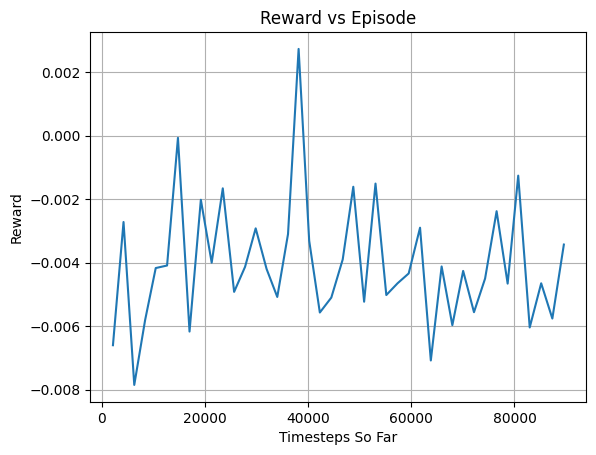

In [7]:
fig, ax = plt.subplots()
ax.plot(df['Timesteps So Far'], df['Average Actor Loss'])
ax.set(xlabel='Timesteps So Far', ylabel='Reward',
       title='Reward vs Episode')
ax.grid()
plt.show()
